# MEDICAL INSURANCE COST PREDICTION
NAME: RENJU K S
DATE: 13-05-2024

# INTRODUCTION
Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve
patient care by understanding the factors influencing medical costs for its patients. To achieve
this, Hospital ABC has collected a comprehensive dataset containing information about patients'
demographics, lifestyle, health status, and medical expenses etc. The dataset includes attributes
such as age, gender, BMI, smoking status, region, as well as additional information like
occupation, exercise frequency, chronic conditions, and more.

# Objectives:
1. Explore the relationship between demographic factors (age, gender, region),
lifestyle-related information (BMI, smoking status, exercise frequency), and health status
(chronic conditions, mental health) with medical costs.
2. Investigate the impact of insurance plan type, income level, and family medical history on
healthcare expenses.
3. Analyze the influence of distance to the nearest hospital and frequency of primary care
physician visits on medical charges.
4. Develop a predictive model to estimate medical costs for individual patients based on the
collected features.
5. Evaluate the performance of the predictive model using appropriate metrics such as
mean absolute error or root mean squared error.
6. Interpret the results and provide actionable insights for Hospital ABC to optimize resource
allocation, healthcare planning, and patient support services.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [145]:
#reading csv file
df=pd.read_csv("medical_data - Sheet1.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.78763,0.0,No,East,White Collar,Daily,2.0,Gold,...,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.78763
1,69.0,Male,22.06365,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,...,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.06365
2,46.0,Female,24.03610,2.0,Yes,East,White Collar,Rarely,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.03610
3,32.0,Male,24.22982,2.0,No,North,Blue Collar,Rarely,2.0,Gold,...,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.22982
4,60.0,Male,31.78428,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,...,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.78428


In [123]:
df.shape

(1000, 35)

In [124]:
df.describe()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,950.000000,951.000000,951.000000,950.000000,952.000000,950.000000,950.000000,951.000000,952.000000,902.000000
mean,49.824211,24.951876,2.022082,0.987368,9.548402,0.510526,4.482105,2.080967,993.174177,76.292654
std,18.090384,5.153607,1.421836,0.810786,5.683926,0.500152,2.866028,1.387450,191.866884,18.969338
min,18.000000,8.057860,0.000000,0.000000,0.004859,0.000000,0.000000,0.000000,302.044000,32.640570
25%,35.000000,21.667005,1.000000,0.000000,4.678912,0.000000,2.000000,1.000000,860.441375,60.710098
50%,50.000000,24.795710,2.000000,1.000000,9.295443,1.000000,5.000000,2.000000,997.597050,76.404575
75%,66.000000,28.548710,3.000000,2.000000,14.103435,1.000000,7.000000,3.000000,1124.350500,91.895003
max,79.000000,40.709830,4.000000,2.000000,19.978090,1.000000,9.000000,4.000000,1545.466000,120.709800


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            950 non-null    float64
 1   Sex                            950 non-null    object 
 2   BMI                            951 non-null    float64
 3   Children                       951 non-null    float64
 4   Smoker                         952 non-null    object 
 5   Region                         952 non-null    object 
 6   Occupation                     951 non-null    object 
 7   Exercise_Frequency             951 non-null    object 
 8   Chronic_Conditions             950 non-null    float64
 9   Insurance_Plan_Type            951 non-null    object 
 10  Marital_Status                 953 non-null    object 
 11  Distance_to_Nearest_Hospital   952 non-null    float64
 12  Income_Level                   950 non-null    ob

In [126]:
df.isnull().sum()

Age                               50
Sex                               50
BMI                               49
Children                          49
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Chronic_Conditions                50
Insurance_Plan_Type               49
Marital_Status                    47
Distance_to_Nearest_Hospital      48
Income_Level                      50
Family_Medical_History            50
Primary_Care_Physician_Visits     50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
E

In [127]:
categorical_columns=[]
numerical_columns=[]
for column in df.columns:
    if df[column].dtypes=='object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
         
print ('Categorical COlumns are',categorical_columns)
print()
print ('Numerical COlumns are',numerical_columns)


Categorical COlumns are ['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency', 'Insurance_Plan_Type', 'Marital_Status', 'Income_Level', 'Mental_Health_Status', 'Prescription_Medication_Usage', 'Employment_Status', 'Education_Level', 'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level', 'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare', 'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']

Numerical COlumns are ['Age', 'BMI', 'Children', 'Chronic_Conditions', 'Distance_to_Nearest_Hospital', 'Family_Medical_History', 'Primary_Care_Physician_Visits', 'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges']


# EDA and DataPreprocessing

# imputing using Simple Imputer

In [128]:
cat_col=categorical_columns.copy()
cat_col.remove('Alcohol_Consumption')

In [129]:
cat_col

['Sex',
 'Smoker',
 'Region',
 'Occupation',
 'Exercise_Frequency',
 'Insurance_Plan_Type',
 'Marital_Status',
 'Income_Level',
 'Mental_Health_Status',
 'Prescription_Medication_Usage',
 'Employment_Status',
 'Education_Level',
 'Dietary_Habits',
 'Sleep_Quality',
 'Stress_Level',
 'Medication_Adherence',
 'Physical_Activity',
 'Access_to_Healthcare',
 'Social_Support',
 'Environmental_Factors',
 'Genetic_Predisposition',
 'Health_Literacy_Level',
 'Comorbidities',
 'Access_to_Telemedicine']

In [146]:
# imputing categorical values that have nan values 1 using mode
#columns_to_impute=[categorical_columns]

imputer=SimpleImputer(strategy='most_frequent')
imputer_df=pd.DataFrame(imputer.fit_transform(df[cat_col]))
imputer_df.columns=imputer.get_feature_names_out()
imputer_df.index=df.index
df1=pd.concat((imputer_df,df.drop(columns=cat_col)),axis=1)

In [131]:
df1.isnull().sum()

Sex                                0
Smoker                             0
Region                             0
Occupation                         0
Exercise_Frequency                 0
Insurance_Plan_Type                0
Marital_Status                     0
Income_Level                       0
Mental_Health_Status               0
Prescription_Medication_Usage      0
Employment_Status                  0
Education_Level                    0
Dietary_Habits                     0
Sleep_Quality                      0
Stress_Level                       0
Medication_Adherence               0
Physical_Activity                  0
Access_to_Healthcare               0
Social_Support                     0
Environmental_Factors              0
Genetic_Predisposition             0
Health_Literacy_Level              0
Comorbidities                      0
Access_to_Telemedicine             0
Age                               50
BMI                               49
Children                          49
C

In [147]:
# imputing numerical value using median
imputer=SimpleImputer(strategy='median')
imputer_df=pd.DataFrame(imputer.fit_transform(df1[numerical_columns]))
imputer_df.columns=imputer.get_feature_names_out()
imputer_df.index=df1.index
df2=pd.concat((imputer_df,df1.drop(columns=numerical_columns)),axis=1)

In [148]:
df2.isnull().sum()

Age                                0
BMI                                0
Children                           0
Chronic_Conditions                 0
Distance_to_Nearest_Hospital       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Emergency_Room_Visits              0
Healthcare_Utilization             0
Charges                            0
Sex                                0
Smoker                             0
Region                             0
Occupation                         0
Exercise_Frequency                 0
Insurance_Plan_Type                0
Marital_Status                     0
Income_Level                       0
Mental_Health_Status               0
Prescription_Medication_Usage      0
Employment_Status                  0
Education_Level                    0
Dietary_Habits                     0
Sleep_Quality                      0
Stress_Level                       0
Medication_Adherence               0
Physical_Activity                  0
A

# Identifying Outliers

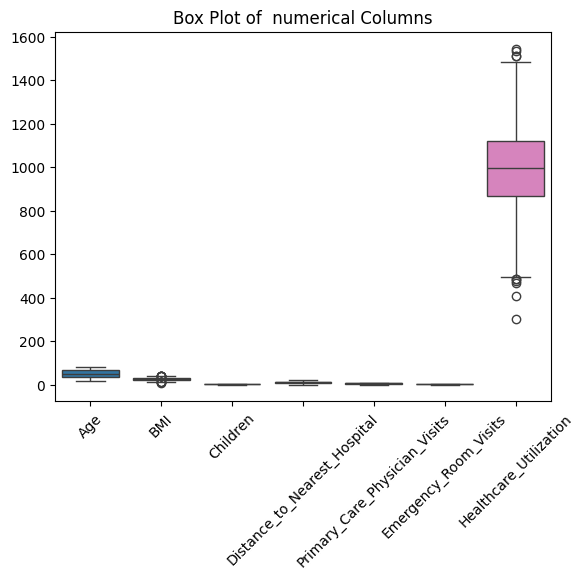

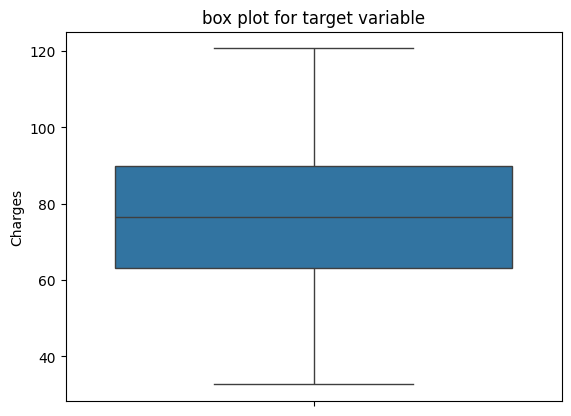

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example assuming 'usedcar_df_outliers' is your DataFrame
columns_of_interest = ['Age','BMI','Children','Distance_to_Nearest_Hospital','Primary_Care_Physician_Visits',
                       'Emergency_Room_Visits','Healthcare_Utilization']

# Create a box plot for multiple columns
sns.boxplot(data=df2[columns_of_interest])
#plt.figsize(15,20)
plt.title('Box Plot of  numerical Columns')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()
sns.boxplot(df2['Charges'])
plt.title('box plot for target variable')
plt.show()

The numerical columns 'Healthcare_Utilization' and 'BMI' are only having outliers

# Outlier Removal# 

In [191]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Identify columns for outlier removal using IQR
columns_iqr = ['BMI','Healthcare_Utilization']

# Remove outliers using IQR
for column in columns_iqr:
    df3 = remove_outliers_iqr(df2, column)


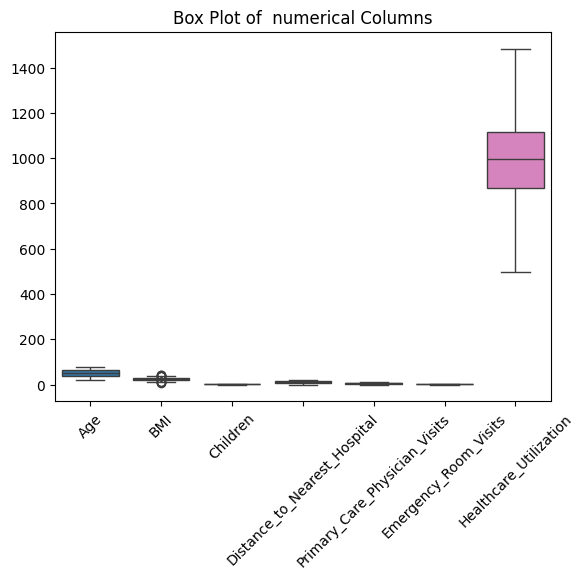

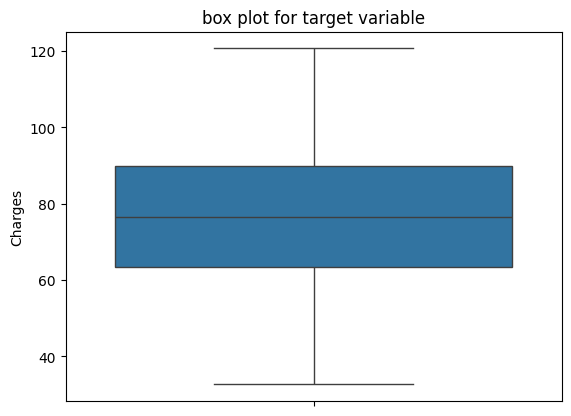

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example assuming 'usedcar_df_outliers' is your DataFrame
columns_of_interest = ['Age','BMI','Children','Distance_to_Nearest_Hospital','Primary_Care_Physician_Visits',
                       'Emergency_Room_Visits','Healthcare_Utilization']

# Create a box plot for multiple columns
sns.boxplot(data=df3[columns_of_interest])
#plt.figsize(15,20)
plt.title('Box Plot of  numerical Columns')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()
sns.boxplot(df3['Charges'])
plt.title('box plot for target variable')
plt.show()

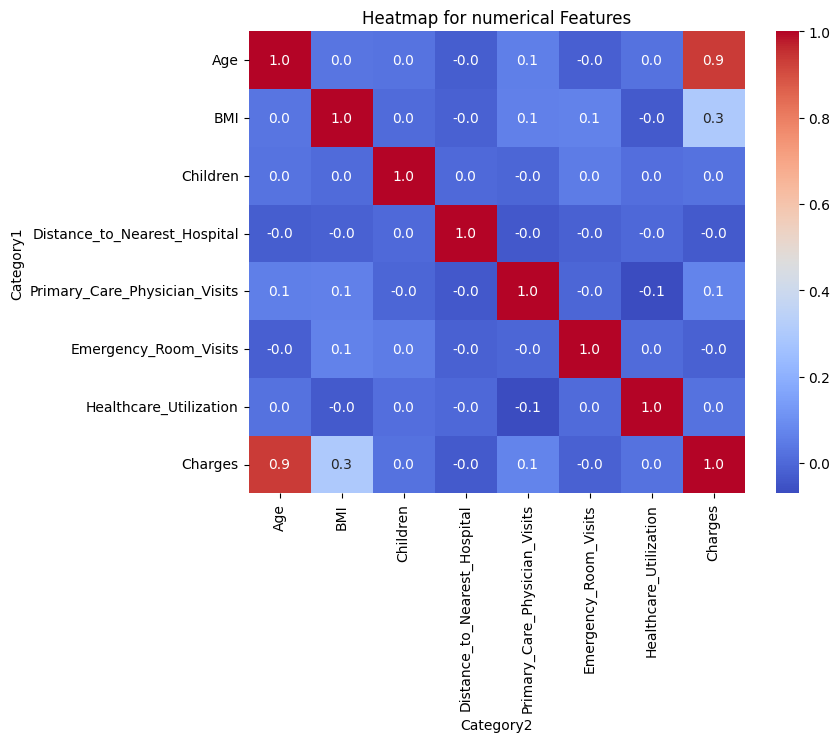

In [137]:
#cross_tab = pd.crosstab(df3['Age'], df3['Charges'])

heatmap_df =df3[['Age','BMI','Children','Distance_to_Nearest_Hospital','Primary_Care_Physician_Visits',
                       'Emergency_Room_Visits','Healthcare_Utilization','Charges']]
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df.corr(),annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap for numerical Features')
plt.xlabel('Category2')
plt.ylabel('Category1')
plt.show()

<Axes: xlabel='Region', ylabel='Charges'>

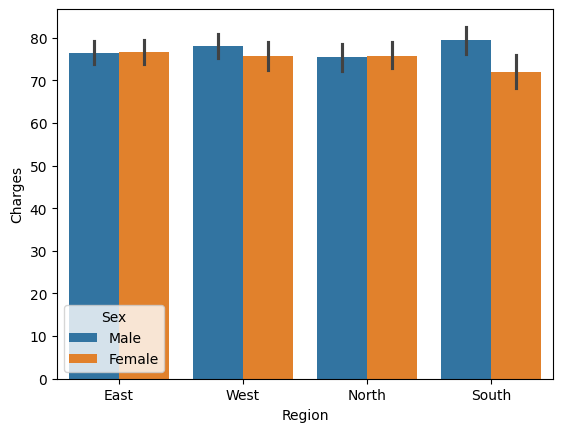

In [238]:
#Explore the relationship between demographic factors (age, gender, region),
#lifestyle-related information (BMI, smoking status, exercise frequency), and health status
#(chronic conditions, mental health) with medical costs.
sns.barplot(x='Region',y='Charges',data=df3,hue='Sex')

<Axes: xlabel='Age', ylabel='Charges'>

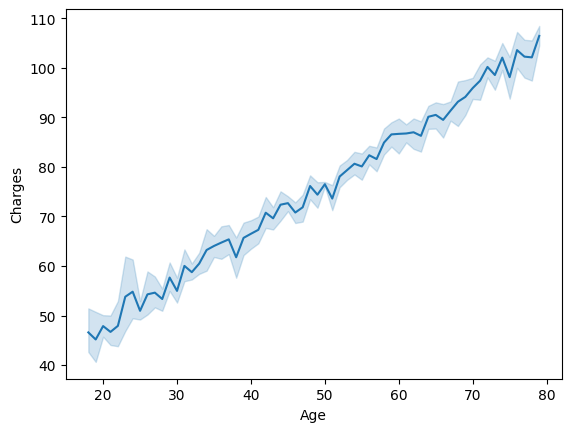

In [239]:
sns.lineplot(x='Age',y='Charges',data=df3)

<Axes: xlabel='Exercise_Frequency', ylabel='Charges'>

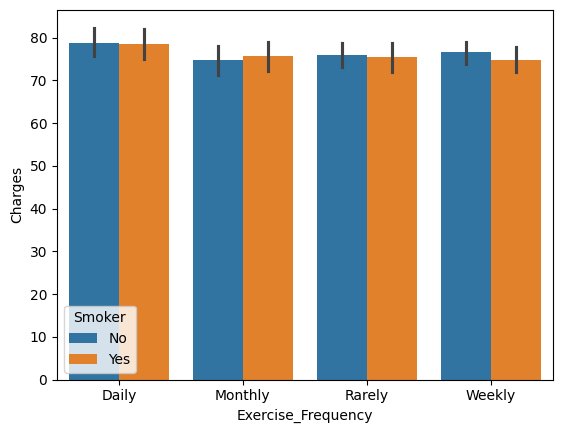

In [240]:
sns.barplot(x='Exercise_Frequency',y='Charges',data=df3,hue='Smoker')

<Axes: xlabel='BMI', ylabel='Charges'>

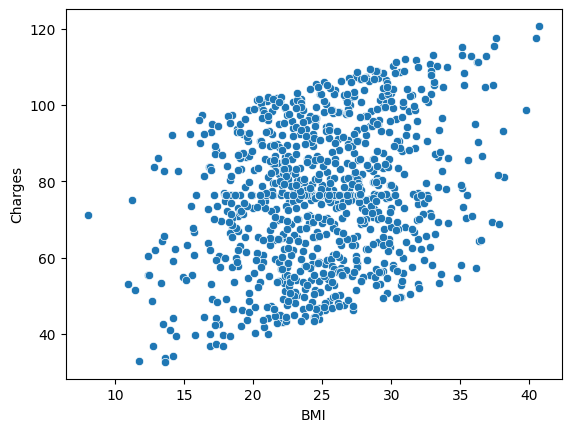

In [241]:
sns.scatterplot(x='BMI',y='Charges',data=df3)

<Axes: xlabel='Mental_Health_Status', ylabel='Charges'>

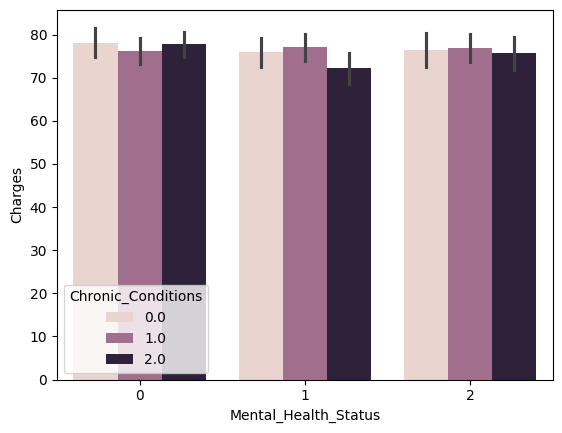

In [242]:
sns.barplot(x='Mental_Health_Status',y='Charges',data=df3,hue='Chronic_Conditions')

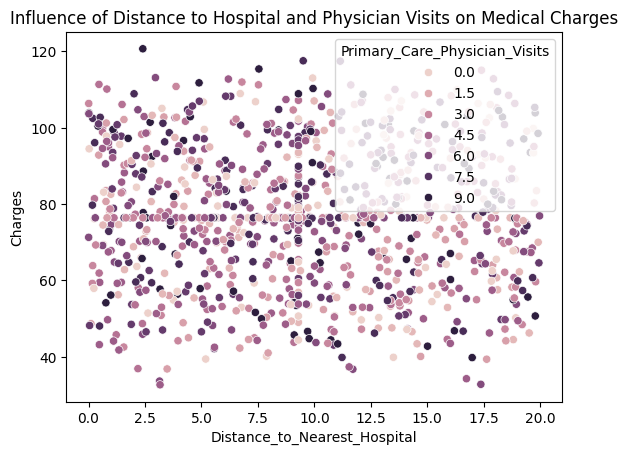

In [138]:
#Analyze the influence of distance to the nearest hospital and frequency of primary care
#physician visits on medical charges
# Create scatter plot
sns.scatterplot(data=df3, x='Distance_to_Nearest_Hospital', y='Charges', hue='Primary_Care_Physician_Visits')
plt.title('Influence of Distance to Hospital and Physician Visits on Medical Charges')
plt.show()

<BarContainer object of 990 artists>

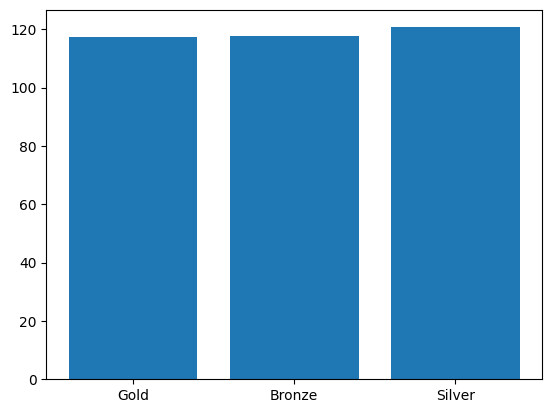

In [139]:
#Investigate the impact of insurance plan type, income level, and family medical history on
#healthcare expense
plt.bar(df3['Insurance_Plan_Type'],df3['Charges'])

<Axes: xlabel='Family_Medical_History', ylabel='Charges'>

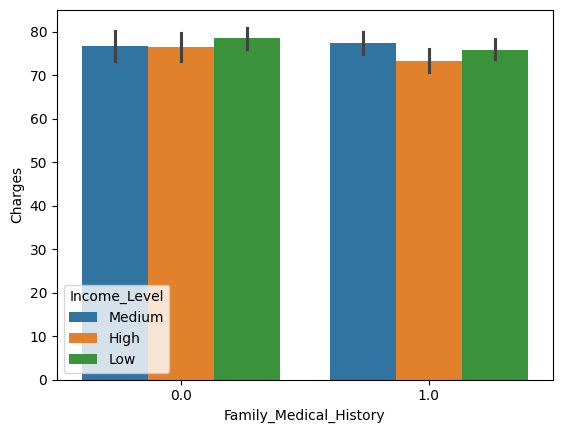

In [225]:
sns.barplot(x='Family_Medical_History',y='Charges',data=df2,hue='Income_Level')

# Encoding categorical values

In [172]:
#displaying unique values in each variable
for col in cat_col:
    print(col,df3[col].unique())


Sex ['Male' 'Female']
Smoker ['No' 'Yes']
Region ['East' 'West' 'North' 'South']
Occupation ['White Collar' 'Blue Collar' 'Other']
Exercise_Frequency ['Daily' 'Monthly' 'Rarely' 'Weekly']
Insurance_Plan_Type ['Gold' 'Bronze' 'Silver']
Marital_Status ['Married' 'Single' 'Divorced']
Income_Level ['Medium' 'High' 'Low']
Mental_Health_Status ['Good' 'Fair' 'Poor']
Prescription_Medication_Usage ['Yes' 'No']
Employment_Status ['Self-Employed' 'Unemployed' 'Employed']
Education_Level ['Graduate' 'College' 'High School']
Dietary_Habits ['Unhealthy' 'Healthy']
Sleep_Quality ['Good' 'Poor']
Stress_Level ['High' 'Medium' 'Low']
Medication_Adherence ['No' 'Yes']
Physical_Activity ['Active' 'Inactive']
Access_to_Healthcare ['Difficult' 'Easy']
Social_Support ['Weak' 'Strong']
Environmental_Factors ['Good' 'Poor']
Genetic_Predisposition ['Present' 'Absent']
Health_Literacy_Level ['High' 'Low']
Comorbidities ['Yes' 'No']
Access_to_Telemedicine ['Unavailable' 'Available']


In [193]:
#Label encoding
col_to_label_encode=['Income_Level','Mental_Health_Status','Dietary_Habits','Sleep_Quality','Stress_Level','Physical_Activity',
                     'Access_to_Healthcare','Social_Support','Environmental_Factors',
                     'Genetic_Predisposition','Health_Literacy_Level']
# Initialize label encoder for each column
lebel_encoders={}

# Label encode each column
for col in col_to_label_encode:
    label_encoders[col] = LabelEncoder()
    df3[col] = label_encoders[col].fit_transform(df3[col])

C:\Users\renju\AppData\Local\Temp\ipykernel_15516\3895826816.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = label_encoders[col].fit_transform(df3[col])
C:\Users\renju\AppData\Local\Temp\ipykernel_15516\3895826816.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = label_encoders[col].fit_transform(df3[col])
C:\Users\renju\AppData\Local\Temp\ipykernel_15516\3895826816.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [194]:
df3.tail()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,...,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Alcohol_Consumption,Alcohol_Consumption_no
994,71.0,13.07822,1.0,1.0,3.153221,1.0,3.0,3.0,784.0138,86.07822,...,1,1,1,1,0,0,No,Available,Moderate,0.0
995,18.0,17.79434,0.0,1.0,3.480209,0.0,2.0,2.0,932.2167,36.79434,...,1,0,0,0,0,1,Yes,Unavailable,Heavy,1.0
996,35.0,22.53824,1.0,1.0,15.215190,1.0,2.0,4.0,1280.2350,58.53824,...,0,1,1,0,0,1,Yes,Unavailable,Moderate,0.0
997,49.0,18.28548,4.0,2.0,0.316761,0.0,3.0,1.0,1336.6650,69.28548,...,1,1,1,1,1,0,No,Unavailable,NaN,NaN
998,64.0,22.09611,2.0,0.0,11.156200,1.0,8.0,0.0,779.2834,88.09611,...,0,0,0,0,1,0,Yes,Unavailable,Moderate,0.0


In [195]:
#One hot Encoding 
col_to_onehotencode=['Sex','Smoker','Region','Occupation','Exercise_Frequency','Dietary_Habits','Insurance_Plan_Type',
                     'Marital_Status','Prescription_Medication_Usage','Employment_Status',
                     'Medication_Adherence','Education_Level','Comorbidities',
                     'Access_to_Telemedicine']
#initialize onr hot encoder
encoder=OneHotEncoder(sparse=False,drop='first')

#fit_transform one hot encoder
encoder_df=pd.DataFrame(encoder.fit_transform(df3[col_to_onehotencode]))
encoder_df.columns=encoder.get_feature_names_out()
encoder_df.index=df3.index
df4=pd.concat((encoder_df,df3.drop(columns=col_to_onehotencode)),axis=1)

C:\Users\renju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [196]:
df4.shape

(990, 45)

In [197]:
df4.tail()

,Sex_Male,Smoker_Yes,Region_North,Region_South,Region_West,Occupation_Other,Occupation_White Collar,Exercise_Frequency_Monthly,Exercise_Frequency_Rarely,Exercise_Frequency_Weekly,...,Sleep_Quality,Stress_Level,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Alcohol_Consumption,Alcohol_Consumption_no
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,1,1,1,0,0,Moderate,0.0
995,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1,1,1,0,0,0,0,1,Heavy,1.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,1,1,0,0,1,Moderate,0.0
997,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,1,1,1,1,1,0,NaN,NaN
998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,Moderate,0.0


In [198]:
df4.columns

Index(['Sex_Male', 'Smoker_Yes', 'Region_North', 'Region_South', 'Region_West',
       'Occupation_Other', 'Occupation_White Collar',
       'Exercise_Frequency_Monthly', 'Exercise_Frequency_Rarely',
       'Exercise_Frequency_Weekly', 'Dietary_Habits_1',
       'Insurance_Plan_Type_Gold', 'Insurance_Plan_Type_Silver',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Prescription_Medication_Usage_Yes', 'Employment_Status_Self-Employed',
       'Employment_Status_Unemployed', 'Medication_Adherence_Yes',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Comorbidities_Yes', 'Access_to_Telemedicine_Unavailable', 'Age', 'BMI',
       'Children', 'Chronic_Conditions', 'Distance_to_Nearest_Hospital',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges',
       'Income_Level', 'Mental_Health_Status', 'Sleep_Quality', 'Stress_Level',
       'Physical_Activity', 'Access_to_He

# Imputation using MICE Algorithm
The Multiple Imputation by Chained Equations (MICE) algorithm is a popular method for imputing missing values in datasets. It works by iteratively imputing missing values for each variable based on the observed values of other variables. 

In [189]:
mapping={'Heavy': 1, 'Moderate': 0}
df2['Alcohol_Consumption_no']=df2['Alcohol_Consumption'].map(mapping)
#df4['Alcohol_Consumption_no'].value_counts()

In [190]:
df2['Alcohol_Consumption_no'].value_counts()

Alcohol_Consumption_no
1.0    346
0.0    306
Name: count, dtype: int64

In [199]:
df4.isnull().sum()

Sex_Male                                0
Smoker_Yes                              0
Region_North                            0
Region_South                            0
Region_West                             0
Occupation_Other                        0
Occupation_White Collar                 0
Exercise_Frequency_Monthly              0
Exercise_Frequency_Rarely               0
Exercise_Frequency_Weekly               0
Dietary_Habits_1                        0
Insurance_Plan_Type_Gold                0
Insurance_Plan_Type_Silver              0
Marital_Status_Married                  0
Marital_Status_Single                   0
Prescription_Medication_Usage_Yes       0
Employment_Status_Self-Employed         0
Employment_Status_Unemployed            0
Medication_Adherence_Yes                0
Education_Level_Graduate                0
Education_Level_High School             0
Comorbidities_Yes                       0
Access_to_Telemedicine_Unavailable      0
Age                               

In [201]:
df5=df4.drop('Alcohol_Consumption',axis=1)

In [202]:
#using MICE algorithm
# Initialize MICE imputer
mice_imputer = IterativeImputer()

# Impute missing values
imputed_data = mice_imputer.fit_transform(df5)

# Convert imputed data to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df5.columns)

print("Imputed DataFrame:")
print(imputed_df)

Imputed DataFrame:
     Sex_Male  Smoker_Yes  Region_North  Region_South  Region_West  \
0         1.0         0.0           0.0           0.0          0.0   
1         1.0         1.0           0.0           0.0          1.0   
2         0.0         1.0           0.0           0.0          0.0   
3         1.0         0.0           1.0           0.0          0.0   
4         1.0         0.0           0.0           0.0          0.0   
..        ...         ...           ...           ...          ...   
985       0.0         0.0           0.0           0.0          0.0   
986       1.0         1.0           0.0           0.0          1.0   
987       0.0         1.0           0.0           0.0          0.0   
988       1.0         0.0           0.0           1.0          0.0   
989       1.0         0.0           0.0           0.0          1.0   

     Occupation_Other  Occupation_White Collar  Exercise_Frequency_Monthly  \
0                 0.0                      1.0                

In [203]:
#replacing encoded_col of imputed_df with round()
imputed_df['Alcohol_Consumption_no']=imputed_df['Alcohol_Consumption_no'].round()

In [205]:
imputed_df['Alcohol_Consumption_no'].value_counts()

Alcohol_Consumption_no
1.0    683
0.0    307
Name: count, dtype: int64

In [206]:
#copying imputed_df into df6
df6=imputed_df.copy()

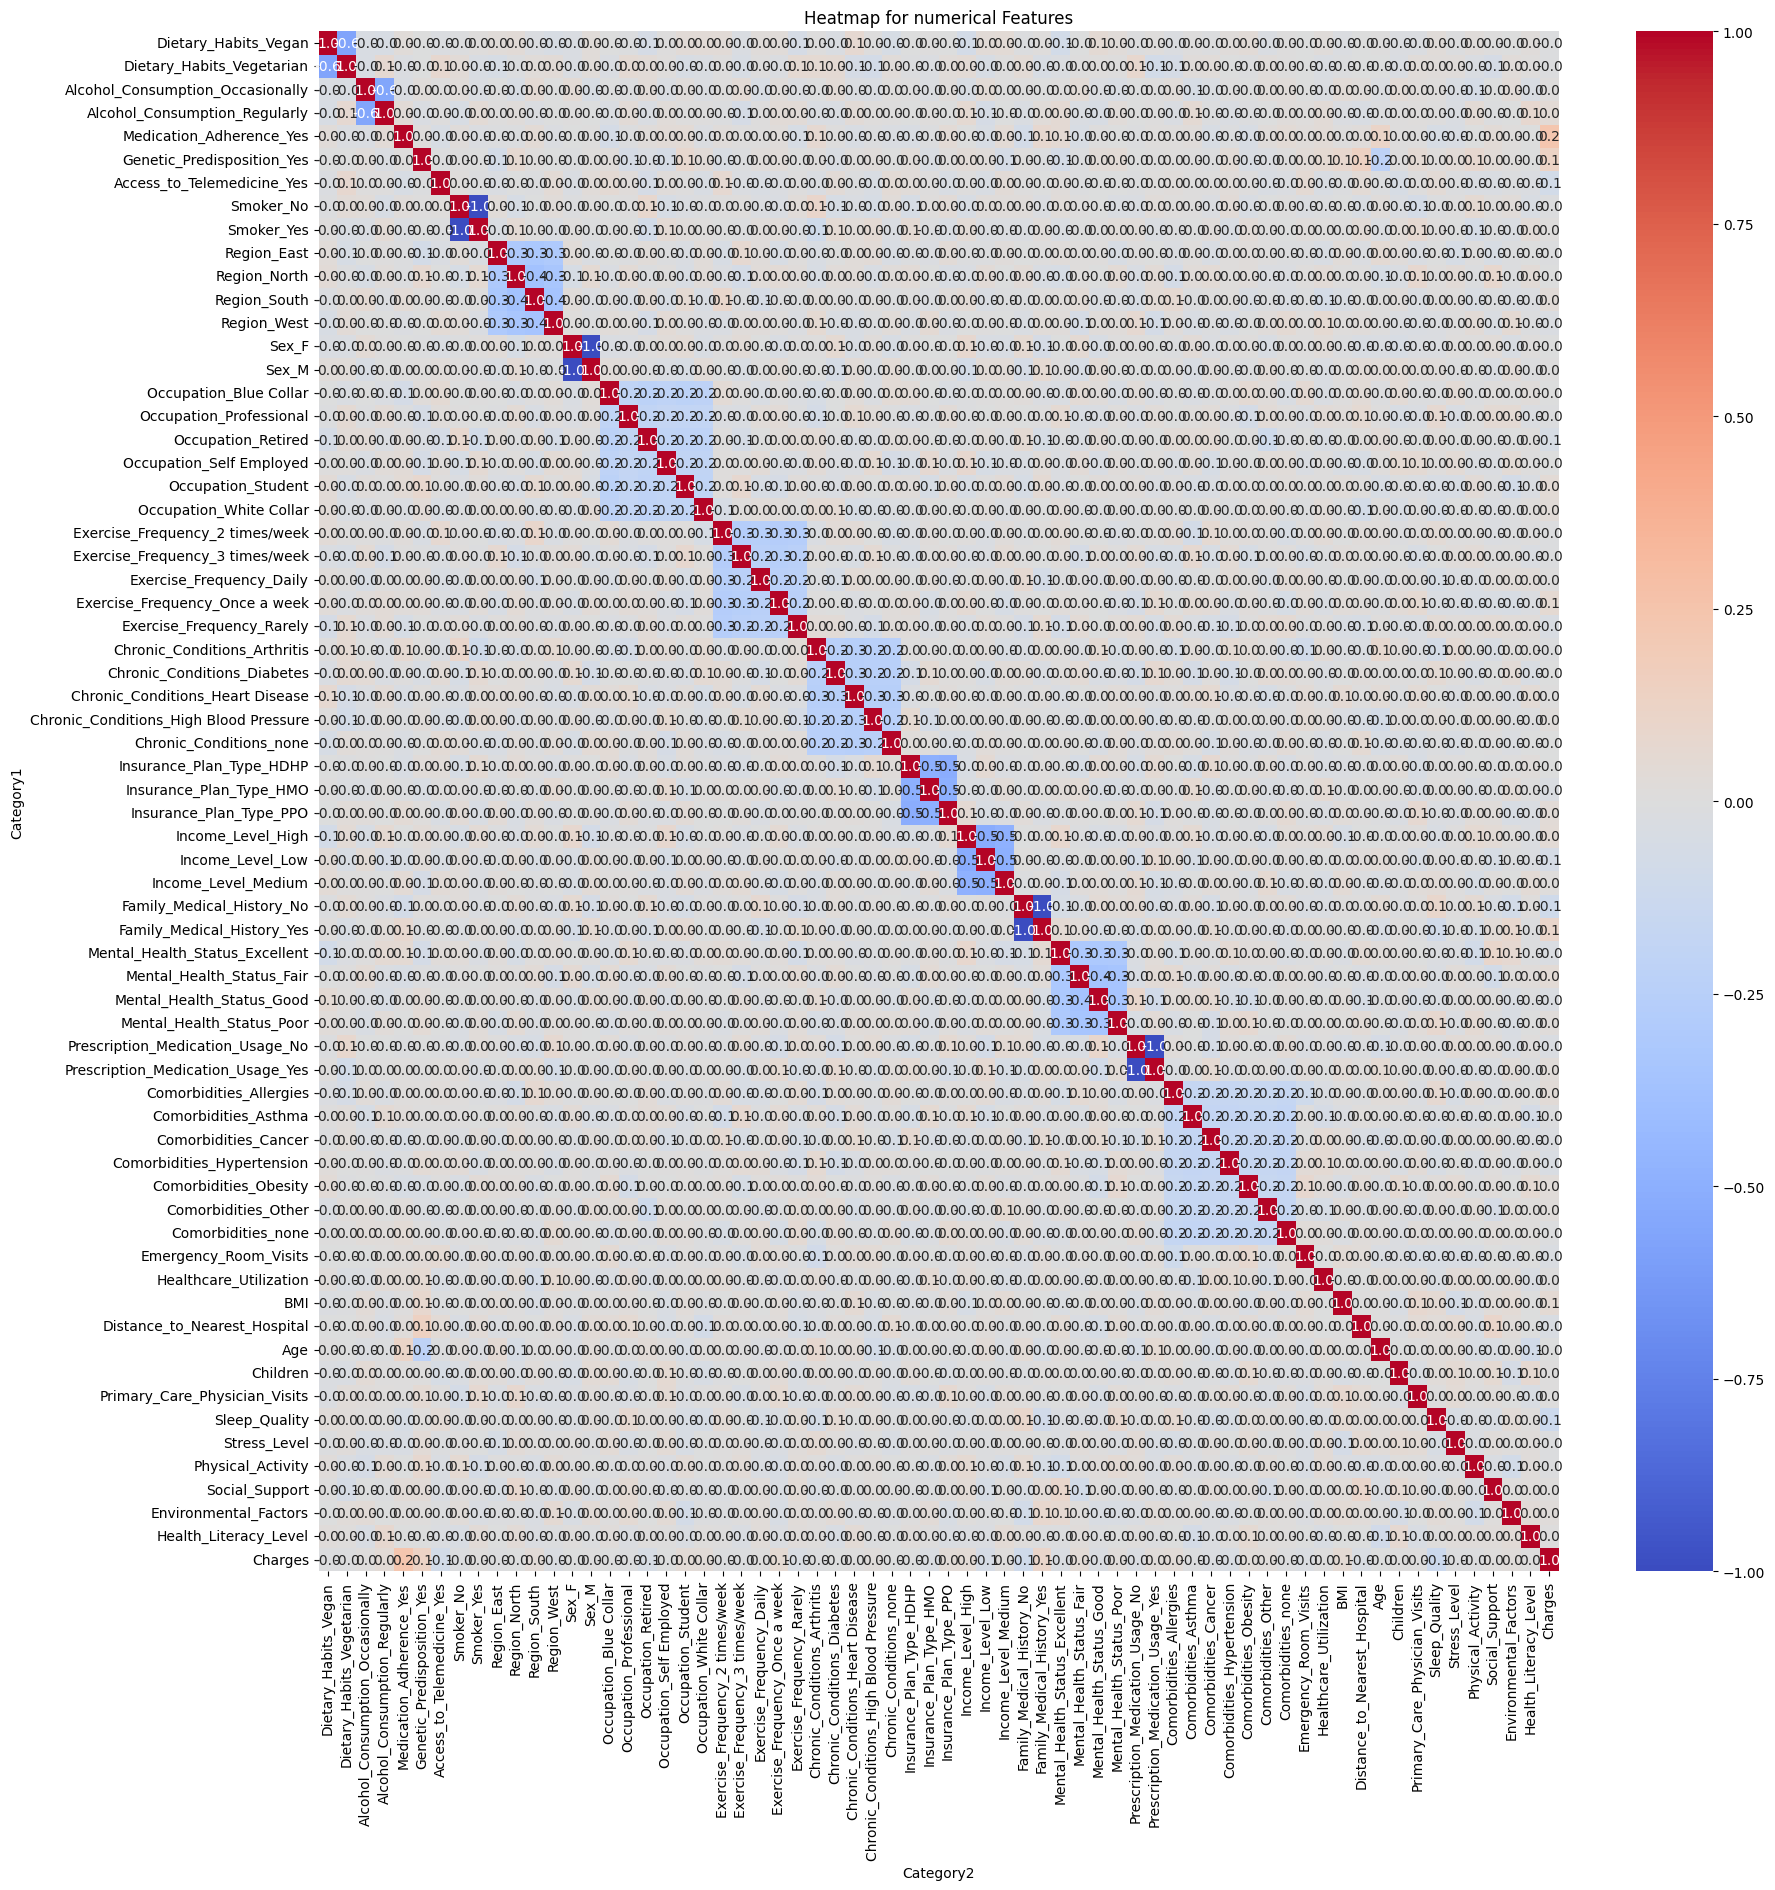

In [79]:
# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df6.corr(),annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap for numerical Features')
plt.xlabel('Category2')
plt.ylabel('Category1')
plt.show()

In [207]:
df6.isnull().sum()

Sex_Male                              0
Smoker_Yes                            0
Region_North                          0
Region_South                          0
Region_West                           0
Occupation_Other                      0
Occupation_White Collar               0
Exercise_Frequency_Monthly            0
Exercise_Frequency_Rarely             0
Exercise_Frequency_Weekly             0
Dietary_Habits_1                      0
Insurance_Plan_Type_Gold              0
Insurance_Plan_Type_Silver            0
Marital_Status_Married                0
Marital_Status_Single                 0
Prescription_Medication_Usage_Yes     0
Employment_Status_Self-Employed       0
Employment_Status_Unemployed          0
Medication_Adherence_Yes              0
Education_Level_Graduate              0
Education_Level_High School           0
Comorbidities_Yes                     0
Access_to_Telemedicine_Unavailable    0
Age                                   0
BMI                                   0


# Feature Scaling

In [208]:
# initialzing standard scaler
scaler=StandardScaler()
 
#fit transform
scaled_df6=scaler.fit_transform(df6)

#Transform the data and convert it back to a DataFrame
df7=pd.DataFrame(scaled_df6,columns=df6.columns)


In [209]:
df7.head()

,Sex_Male,Smoker_Yes,Region_North,Region_South,Region_West,Occupation_Other,Occupation_White Collar,Exercise_Frequency_Monthly,Exercise_Frequency_Rarely,Exercise_Frequency_Weekly,...,Mental_Health_Status,Sleep_Quality,Stress_Level,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Alcohol_Consumption_no
0,0.907306,-0.958439,-0.534522,-0.55012,-0.575018,-0.779194,1.498633,-0.518875,-0.550120,-0.686313,...,0.106349,-0.922208,-1.252513,-1.073394,-0.912871,0.927848,-1.113472,0.944947,-0.929735,-1.491561
1,0.907306,1.043364,-0.534522,-0.55012,1.739077,-0.779194,1.498633,1.927248,-0.550120,-0.686313,...,-1.117905,-0.922208,1.283249,0.931625,-0.912871,0.927848,-1.113472,-1.058260,-0.929735,-1.491561
2,-1.102164,1.043364,-0.534522,-0.55012,-0.575018,-0.779194,1.498633,-0.518875,1.817787,-0.686313,...,-1.117905,-0.922208,-1.252513,0.931625,-0.912871,-1.077763,-1.113472,-1.058260,1.075576,-1.491561
3,0.907306,-0.958439,1.870829,-0.55012,-0.575018,-0.779194,-0.667275,-0.518875,1.817787,-0.686313,...,0.106349,-0.922208,-1.252513,0.931625,-0.912871,-1.077763,-1.113472,0.944947,1.075576,-1.491561
4,0.907306,-0.958439,-0.534522,-0.55012,-0.575018,-0.779194,-0.667275,-0.518875,-0.550120,1.457062,...,-1.117905,1.084354,1.283249,0.931625,1.095445,0.927848,0.898092,0.944947,1.075576,0.670438


In [210]:
df7.isnull().sum()

Sex_Male                              0
Smoker_Yes                            0
Region_North                          0
Region_South                          0
Region_West                           0
Occupation_Other                      0
Occupation_White Collar               0
Exercise_Frequency_Monthly            0
Exercise_Frequency_Rarely             0
Exercise_Frequency_Weekly             0
Dietary_Habits_1                      0
Insurance_Plan_Type_Gold              0
Insurance_Plan_Type_Silver            0
Marital_Status_Married                0
Marital_Status_Single                 0
Prescription_Medication_Usage_Yes     0
Employment_Status_Self-Employed       0
Employment_Status_Unemployed          0
Medication_Adherence_Yes              0
Education_Level_Graduate              0
Education_Level_High School           0
Comorbidities_Yes                     0
Access_to_Telemedicine_Unavailable    0
Age                                   0
BMI                                   0


# Feature Selection and Model Training

In [211]:
X=df7.drop(columns="Charges")
y=df7["Charges"]
 #Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Apply SelectKBest to select top 5 features using f_regression scoring
k_best = SelectKBest(score_func=f_regression, k=5)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train a linear regression model using the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model.predict(X_test_selected)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 0.029435699269175518
Mean Squared Error: 0.029435699269175518
R-squared Score: 0.9675552956718798
Root Mean Squared Error (RMSE): 0.17156835159543707


In [212]:
from sklearn.ensemble import RandomForestRegressor
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest to select top 5 features using f_regression scoring
k_best = SelectKBest(score_func=f_regression, k=5)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_selected, y_train)

# Make predictions on the scaled testing data
y_pred = rf_regressor.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) on original scale
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on original scale:", mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE) on original scale: 0.01778199446830676
Mean Squared Error: 0.01778199446830676
R-squared Score: 0.9804002769693794
Root Mean Squared Error (RMSE): 0.13334914498528574


In [213]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your feature matrix X and target vector y ready
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply SelectKBest to select top 5 features using f_regression scoring
k_best = SelectKBest(score_func=f_regression, k=5)
X_train_selected = k_best.fit_transform(X_train_selected, y_train)
X_test_selected = k_best.transform(X_test_selected)

# Initialize the DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
tree_regressor.fit(X_train_selected, y_train)

# Predict on the testing data
y_pred = tree_regressor.predict(X_test_selected)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.02396839497274523
R-squared Score: 0.973581484136011


In [214]:
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest to select top 5 features using f_regression scoring
k_best = SelectKBest(score_func=f_regression, k=5)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)
# Initialize the MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the regressor to the training data
mlp_regressor.fit(X_train_selected, y_train)

# Predict on the testing data
y_pred = mlp_regressor.predict(X_test_selected)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.03421297110084471
R-squared Score: 0.9622896768511346


In [215]:
from sklearn.svm import SVR
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest to select top 5 features using f_regression scoring
k_best = SelectKBest(score_func=f_regression, k=5)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Initialize and train the SVM regressor
svm_regressor = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression
svm_regressor.fit(X_train_selected, y_train)

# Make predictions on the scaled testing data
y_pred = svm_regressor.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) on original scale
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on original scale:", mse)
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Squared Error (MSE) on original scale: 0.03033655582817143
R-squared Score: 0.9665623508659353


In [220]:
from sklearn.linear_model import Lasso
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # Set regularization strength
lasso.fit(X_train, y_train)

# Print selected features (non-zero coefficients)
selected_features = [df7.columns[i] for i, coef in enumerate(lasso.coef_) if coef != 0]
print("Selected features:", selected_features)

# Train a linear regression model using the selected features
model = LinearRegression()
model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)
# Evaluate model performance
#train_score = lasso.score(X_train, y_train)
#test_score = lasso.score(X_test, y_test)
#print("Training R^2:", train_score)
#print("Test R^2:", test_score)


Selected features: ['Age', 'BMI']
Mean Squared Error: 0.029511583123387027
Mean Squared Error: 0.029511583123387027
R-squared Score: 0.9674716547435411
Root Mean Squared Error (RMSE): 0.1717893568396687


In [221]:
from sklearn.linear_model import Lasso
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # Set regularization strength
lasso.fit(X_train, y_train)

# Print selected features (non-zero coefficients)
selected_features = [df7.columns[i] for i, coef in enumerate(lasso.coef_) if coef != 0]
print("Selected features:", selected_features)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train[selected_features], y_train)

# Make predictions on the scaled testing data
y_pred = rf_regressor.predict(X_test[selected_features])

# Calculate Mean Squared Error (MSE) on original scale
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on original scale:", mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Selected features: ['Age', 'BMI']
Mean Squared Error (MSE) on original scale: 0.016469088372598337
Mean Squared Error: 0.016469088372598337
R-squared Score: 0.9818473922458442
Root Mean Squared Error (RMSE): 0.12833194603292797


In [222]:
from sklearn.linear_model import Lasso
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # Set regularization strength
lasso.fit(X_train, y_train)

# Print selected features (non-zero coefficients)
selected_features = [df7.columns[i] for i, coef in enumerate(lasso.coef_) if coef != 0]
print("Selected features:", selected_features)

# Initialize the DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
tree_regressor.fit(X_train[selected_features], y_train)

# Predict on the testing data
y_pred = tree_regressor.predict(X_test[selected_features])

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Selected features: ['Age', 'BMI']
Mean Squared Error: 0.020098080784426573
R-squared Score: 0.9778474333953997


In [223]:
from sklearn.linear_model import Lasso
X=df7.drop(columns="Charges")
y=df7["Charges"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # Set regularization strength
lasso.fit(X_train, y_train)

# Print selected features (non-zero coefficients)
selected_features = [df7.columns[i] for i, coef in enumerate(lasso.coef_) if coef != 0]
print("Selected features:", selected_features)


# Initialize and train the SVM regressor
svm_regressor = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression
svm_regressor.fit(X_train[selected_features], y_train)

# Make predictions on the scaled testing data
y_pred = svm_regressor.predict(X_test[selected_features])

# Calculate Mean Squared Error (MSE) on original scale
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on original scale:", mse)
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Selected features: ['Age', 'BMI']
Mean Squared Error (MSE) on original scale: 0.027596432745582277
R-squared Score: 0.9695825775106055
